In [1]:
import itertools
import linecache
import os
import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

pp = pprint.PrettyPrinter(indent=4)

print("Using pandas %s version" % pd.__version__)
print("Using seaborn %s version" % sns.__version__)
print("Using scipy %s version" % scipy.__version__)

Using pandas 1.2.0 version
Using seaborn 0.11.1 version
Using scipy 1.6.0 version


In [4]:
# splitsWithoutGroupShuffleSplit = list(
#     filter(lambda x: (x != "GroupShuffleSplit"), splits)
# )

data_dir = r"C:\Projects\RecSys2020\results\_mbd\\"
#data_dir = r"E:\OneDrive\MSThesis\_2019\master_thesis_template_vu_mif_cs1-master\master_thesis_template_vu_mif_cs1-master\_third_part\img\\"



imfFull = "#548235"
imfTest = "#99C979"

knnFull = "#C55A11"
knnTest = "#ff5811"
normalizedKnnFull = "#4A76C6"
normalizedKnnTest = "#19C3FF"

average = "#FFC000"
popularity = "#F18F8F"
random = "#BFBFBF"

rec_colors_dict = {
    "iMF (full)": "#548235",
    "iMF (test)": "#99C979",
    "kNN (full/test)": "#C55A11",
    "kNN (full)": "#C55A11",
    "kNN (test)": "#ff5811",
    "Normalized kNN (full)": "#4A76C6",
    "Normalized kNN (test)": "#19C3FF",
    "Average Rating": "#FFC000",
    "Popularity": "#F18F8F",
    "Random": "#BFBFBF",
}
# colors = ('red','blue','green','magenta', 'black', 'purple', 'grey', 'orange')
rec_colors = (
    imfFull,
    imfTest,
    knnFull,
    knnTest,
    normalizedKnnFull,
    normalizedKnnTest,
    average,
    popularity,
    random,
)

datasets = ["ml1m", "ml100k"]
splits = ["", "-male", "-female" ,"-young", "-old"]


In [5]:
def rank(data):
    artists = []
    data.set_index("Target size")
    for i, j in data.groupby(["Target size"], axis=0):
        del j["Target size"]
        rank = j.rank(axis=1, ascending=False)
        artist = np.array(rank)[0]
        artists.append(artist)

    rank = []
    for i, t in enumerate(data.keys()[1:]):
        rank.append([t] + np.array(artists)[:, i].tolist())
    return rank

def plot_system_rankings(data, ax, xlabel=r"$|N_{u}|$", ylabel="", xticks=None):
    ax.set_xlim(0,)
    ax.invert_xaxis()
    artists = []
    for row, color in zip(data, rec_colors):
        x = list(range(len(data[0]) - 1))
        artist = plt.Line2D(xdata=x, ydata=[row[1:]], lw=1, color=color, marker="o")
        ax.add_artist(artist)
        artists.append(artist)

    ax.set_ybound([0.8, 9])
    ax.set_xbound([-0.2, len(data) + 0.06])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xticks(list(range(len(data[0]) - 1)))
    ax.set_xticklabels(list(itertools.chain(xticks[:-1], ["Full"])))
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

    # plt.xticks(list(range(len(ndcg_rank[0])-1)), ndcg['Target size'].array)
    ax.set_yticks(list(range(1, 9)))
    ax.invert_yaxis()
    ax.invert_xaxis()

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    return artists

print("plot_metrics")


def plot_metrics(
    data, ax, xlabel=r"$|N_{u}|$", ylabel="", twinx=None, title=None, colors=None
):
    ax.invert_xaxis()

    if colors is None:
        colors = rec_colors

    artists = []
    for column_title, color in zip(data.columns[1:], colors):
        x = list(range(len(data[column_title])))
        artist = plt.Line2D(
            xdata=x, ydata=[data[column_title]], lw=1, color=color, marker="o"
        )
        ax.add_artist(artist)
        artists.append(artist)

        #print(data)

    max = data.max()[1:].max()
    ax.set_ybound([0, max + max * 0.1 + 0.0000001])
    ax.set_xbound([-0.1, len(data) + 0.06])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xticks(list(range(len(data["Target size"]))))
    ax.set_xticklabels(list(itertools.chain(data["Target size"].array[:-1], ["Full"])))
    ax.invert_xaxis()
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if twinx is not None and twinx.max() > 0:
        #print("twinx", twinx)
        label = "Sum of p-values"
        ax2 = ax.twinx()
        (e,) = ax2.plot(
            list(range(len(twinx))),
            twinx,
            label=label,
            lw=1,
            color="black",
            fillstyle="none",
            markeredgecolor="black",
            marker="s",
        )
        ax2.set_ylabel(label)
        max = twinx.max()
        ax2.set_ylim(0, max + 0.1 * max + 0.01)

        ax2.spines["top"].set_visible(False)
        ax2.spines["right"].set_visible(False)
        ax2.spines["bottom"].set_visible(False)
        ax2.spines["left"].set_visible(False)
        # ax2.legend(loc=1)
        # artists.append(ax2)
        artists.append(e)

    if title is not None:
        ax.set_title(title)

    if xlabel != "":
        ax.set_xlabel(xlabel)
    return artists, data.columns[1:]

plot_metrics


C:\Projects\RecSys2020\results\figure303.ml1m.txt
['ml1m', '', 'P@10', 4, 13]
['ml1m', '', 'Recall@10', 20, 13]
['ml1m', '', 'nDCG@10', 36, 13]
['ml1m', '', 'FScore@10', 52, 13]
C:\Projects\RecSys2020\results\figure303.ml1m-male.txt
['ml1m', '-male', 'P@10', 4, 13]
['ml1m', '-male', 'Recall@10', 20, 13]
['ml1m', '-male', 'nDCG@10', 36, 13]
['ml1m', '-male', 'FScore@10', 52, 13]
C:\Projects\RecSys2020\results\figure303.ml1m-female.txt
['ml1m', '-female', 'P@10', 4, 13]
['ml1m', '-female', 'Recall@10', 20, 13]
['ml1m', '-female', 'nDCG@10', 36, 13]
['ml1m', '-female', 'FScore@10', 52, 13]
C:\Projects\RecSys2020\results\figure303.ml1m-young.txt
['ml1m', '-young', 'P@10', 4, 13]
['ml1m', '-young', 'Recall@10', 20, 13]
['ml1m', '-young', 'nDCG@10', 36, 13]
['ml1m', '-young', 'FScore@10', 52, 13]
C:\Projects\RecSys2020\results\figure303.ml1m-old.txt
['ml1m', '-old', 'P@10', 4, 13]


IndexError: index 8 is out of bounds for axis 0 with size 8

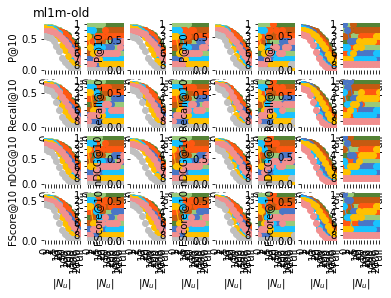

In [9]:
datasets = ["ml1m", "ml100k"]
splits = ["", "-male", "-female" ,"-young", "-old"]

for dataset in datasets:
    fig, axes = plt.subplots(4, 8, sharex="row")
    i = 0
    for y,split in enumerate(splits):

        file = os.path.join(
            r"C:\Projects\RecSys2020\results", "figure303." + dataset + split + ".txt"
        )
        print(file)
        lines_with_metrics = [
            (i, linecache.getline(file, i + 1).strip())
            for i, line in enumerate(open(file))
            if line.endswith("@10\n")
        ]
        # print(lines_with_metrics)

        rows = lines_with_metrics[2][0] - lines_with_metrics[1][0] - 3
        params = dict(filepath_or_buffer=file, sep="\t", nrows=rows)
        axes[0, 0 + i].set_title(dataset + split)

        for j, metric in enumerate(lines_with_metrics):
            metric_name = metric[1]
            metric_line = metric[0]
            table = pd.read_table(header=metric_line - j, **params)
            # pp.pprint([dataset, split, metric_name, metric_line, table])
            pp.pprint([dataset, split, metric_name, metric_line, rows])
            #fig111(data=fig1, title=metric_name, ax1=axes[j, 0 + i], ax2=axes[j, 1 + i], legend=True)
            plot_metrics(table, axes[j][y*2], ylabel=metric_name)
            plot_system_rankings(rank(table), axes[j][y*2+1], xticks=table["Target size"].array)

    # for idx, a in np.ndenumerate(axes):
    #     a.invert_xaxis()
    # plt.suptitle(dataset + split)
    fig.set_size_inches(22, 12)
    fig.tight_layout()
    i = i + 2
plt.show()


In [11]:
# print("figure3\n")
# for split in splitsWithoutGroupShuffleSplit:
#     print(split)
#     ndcg = pd.read_table(
#         r"C:\Projects\RecSys2020\results\\" + split + r"\figure3.txt",
#         sep="\t",
#         header=4,
#         nrows=13,
#     )
#     precision = pd.read_table(
#         r"C:\Projects\RecSys2020\results\\" + split + r"\figure3.txt",
#         sep="\t",
#         header=19,
#         nrows=13,
#     )
#     recall = pd.read_table(
#         r"C:\Projects\RecSys2020\results\\" + split + r"\figure3.txt",
#         sep="\t",
#         header=34,
#         nrows=13,
#     )
#
#     ndcg_rank = rank(ndcg)
#     precision_rank = rank(precision)
#     recall_rank = rank(recall)
#
#     cols = ["Column {}".format(col) for col in range(1, 2)]
#     rows = ["Row {}".format(row) for row in ["Precision@10", "Recall@10", "nDCG@10"]]
#
#     fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
#
#     # for ax, col in zip(axes[0], cols):
#     #    ax.set_title(col)
#     #    #ax.set_xlabel('|Nu|')
#
#     for ax, row in zip(axes[:, 0], rows):
#         ax.set_ylabel(row, rotation=90, size="large")
#
#     plot_metrics(precision, axes[0][0], ylabel="Precision@10")
#     plot_metrics(recall, axes[1][0], ylabel="Recall@10")
#     artists, recommender = plot_metrics(ndcg, axes[2][0], ylabel="nDCG@10")
#
#     plot_system_rankings(precision_rank, axes[0][1], xticks=ndcg["Target size"].array)
#     plot_system_rankings(recall_rank, axes[1][1], xticks=ndcg["Target size"].array)
#     plot_system_rankings(ndcg_rank, axes[2][1], xticks=ndcg["Target size"].array)
#
#     plt.legend(
#         artists,
#         recommender,
#         bbox_to_anchor=(1.05, 1),
#         loc="upper left",
#         # title="Recommender",
#         title_fontsize="x-large",
#     )
#     fig.suptitle(split)
#
#     fig.tight_layout()
#     png = os.path.join(data_dir, "figure3." + split + ".png")
#     fig.savefig(png, format="png", dpi=300)
#     # dpi=1200
# #plt.show()
# plt.close("all")

In [12]:
# print("figure3.full.png\n")
# split = "StratifiedShuffleSplit"
# ndcg = pd.read_table(
#     r"C:\Projects\RecSys2020\results\\" + split + r"\figure3.txt",
#     sep="\t",
#     header=4,
#     nrows=13,
# )
# precision = pd.read_table(
#     r"C:\Projects\RecSys2020\results\\" + split + r"\figure3.txt",
#     sep="\t",
#     header=19,
#     nrows=13,
# )
# recall = pd.read_table(
#     r"C:\Projects\RecSys2020\results\\" + split + r"\figure3.txt",
#     sep="\t",
#     header=34,
#     nrows=13,
# )
#
# ndcg_rank = rank(ndcg)
# precision_rank = rank(precision)
# recall_rank = rank(recall)
#
# cols = ["Column {}".format(col) for col in range(1, 4)]
# rows = [row for row in ["Precision@10", "Recall@10", "nDCG@10"]]
#
# fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(14, 8))
#
# # for ax, col in zip(axes[0], cols):
# #    ax.set_title(col)
# #    #ax.set_xlabel('|Nu|')
#
# for ax, row in zip(axes[:, 0], rows):
#     ax.set_ylabel(row, rotation=90, size="large")
#
# plot_metrics(precision, axes[0][0], ylabel="Precision@10")
# plot_metrics(recall, axes[1][0], ylabel="Recall@10")
# artists, recommender = plot_metrics(ndcg, axes[2][0], ylabel="nDCG@10")
#
# plot_system_rankings(precision_rank, axes[0][1], xticks=ndcg["Target size"].array)
# plot_system_rankings(recall_rank, axes[1][1], xticks=ndcg["Target size"].array)
# plot_system_rankings(ndcg_rank, axes[2][1], xticks=ndcg["Target size"].array)
#
# axes[0][0].set_title("MovieLens 1M")
# axes[0][2].set_title("Yahoo R3")
#
# ## YAHOOO
# ndcg = pd.read_table(
#     r"C:\Projects\RecSys2020\results\figure3.txt",
#     sep="\t",
#     header=52,
#     nrows=11,
# )
# precision = pd.read_table(
#     r"C:\Projects\RecSys2020\results\figure3.txt",
#     sep="\t",
#     header=52,
#     nrows=11,
# )
# recall = pd.read_table(
#     r"C:\Projects\RecSys2020\results\figure3.txt",
#     sep="\t",
#     header=78,
#     nrows=11,
# )
#
# ndcg_rank = rank(ndcg)
# precision_rank = rank(precision)
# recall_rank = rank(recall)
#
# for ax, row in zip(axes[:, 0], rows):
#     ax.set_ylabel(row, rotation=90, size="large")
#
# plot_metrics(precision, axes[0][2], ylabel="Precision@10")
# plot_metrics(recall, axes[1][2], ylabel="Recall@10")
# artists, recommender = plot_metrics(ndcg, axes[2][2], ylabel="nDCG@10")
#
# plot_system_rankings(precision_rank, axes[0][3], xticks=ndcg["Target size"].array)
# plot_system_rankings(recall_rank, axes[1][3], xticks=ndcg["Target size"].array)
# plot_system_rankings(ndcg_rank, axes[2][3], xticks=ndcg["Target size"].array)
#
# ## YAHOOO
#
# plt.legend(
#     artists,
#     recommender,
#     bbox_to_anchor=(1.05, 1),
#     loc="upper left",
#     # title="Recommender",
#     title_fontsize="x-large",
# )
# # fig.suptitle(split)
# fig.set_size_inches(13, 10)
# fig.tight_layout()
# png = os.path.join(data_dir, "figure3.full.png")
# fig.savefig(png, format="png", dpi=300)
# # dpi=1200
# plt.show()
# plt.close("all")



In [7]:
plt.close("all")
plt.show()